In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Model:
$$
(p+\frac{a}{v^2})(v-b)=RT
$$

we're looking for v, so:

$$
f(v) = pv^3 -v^2(RT +pb) +av - ab
$$

Taking derivate:

$$
f'(v) = 3pv^2 -2v(RT+pb)+a
$$

Which makes the Newton's formula take the following form:

$$
v_{n+1} = v_n - \frac{pv_n^3 -v_n^2(RT +pb) +av_n - ab}{3pv_n^2 -2v_n(RT+pb)+a}
$$

Exact solution:

$$
v_0 = \frac{-a+\sqrt{s^2-4ab^2p}}{2}, $$to satisfy$$v_0 > 0
$$

Let's use initail $v$ derived from ideal gas law:
$$
v = \frac{RT}{p}
$$

Tolerance $\epsilon$ is defined such that $|v-v_0|\leq\epsilon$\
The parameters are as follows:

In [89]:
R = .08
a = 3.592
b = .04267
p = 10
T = 100
v_init = R*T/p*10 #ideal gas won't converge
eps = .01

Function

In [90]:
def next_approx(v):
    return v - (p*v**3 - v**2*(R*T+p*b)+a*v-a*b)/(3*p*v**2 - 2*v*(R*T+p*b)+a)

v0 = (np.sqrt(a**2-4*a*b**2*p)-a)/2

In [91]:
v = v_init
err = abs(v0-v)
vs=[v]
errs=[err]
while err > eps:
    v = next_approx(v)
    err = abs(v0-v)
    vs.append(v)
    errs.append(err)

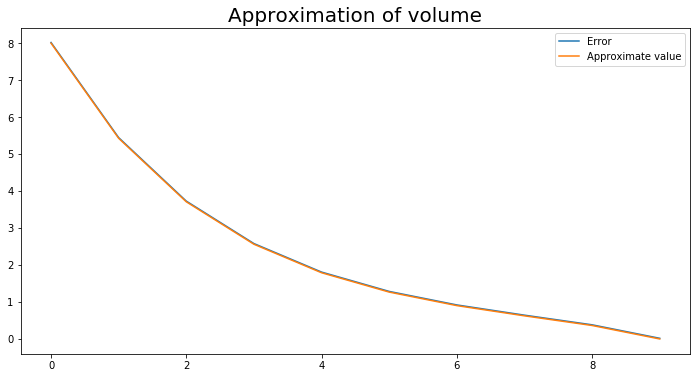

In [92]:
plt.figure(figsize=(12,6))
plt.title(f"Approximation of volume", fontsize=20)
plt.plot(errs, label="Error")
plt.plot(vs, label="Approximate value")
plt.legend();